### scikit-mobility tutorials

# 3 - Trajectory models

Generative models of individual trajectories.

- [Density EPR](#Density-EPR)

In [1]:
%matplotlib inline
import skmob as sm
from skmob.utils import utils, plot, constants

from geopy.distance import distance
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Exploration and Preferential Return EPR

### Density EPR

In [2]:
from skmob.models.epr import DensityEPR
from skmob.models.epr import load_spatial_tessellation, compute_od_matrix

In [3]:
start_time, end_time = pd.to_datetime('2019/01/01 08:00:00'), pd.to_datetime('2019/01/14 08:00:00')
sepr = DensityEPR()

In [5]:
spatial_tessellation = load_spatial_tessellation('data/location2info_trentino')

6259it [00:00, 52743.01it/s]


In [6]:
od_matrix = compute_od_matrix(spatial_tessellation, use_relevance=True)

100%|██████████| 6256/6256 [01:59<00:00, 52.32it/s]


In [10]:
tdf = sepr.generate(start_time, end_time, spatial_tessellation, n_agents=100, od_matrix=od_matrix, verbose=True)

100%|██████████| 100/100 [00:12<00:00,  8.19it/s]


In [11]:
tdf.parameters

{'model': {'class': <function skmob.models.epr.DensityEPR.__init__(self, name='Density EPR model', rho=0.6, gamma=0.21, beta=0.8, tau=17, min_wait_time_minutes=10)>,
  'generate': {'end_date': Timestamp('2019-01-14 08:00:00'),
   'n_agents': 100,
   'random_state': None,
   'start_date': Timestamp('2019-01-01 08:00:00'),
   'starting_location': None,
   'verbose': True}}}

In [12]:
tdf.head()

,uid,datetime,lat,lng
0,1,2019-01-01 08:00:00.000000,46.397461,11.829286
1,1,2019-01-01 08:58:07.838255,46.479001,11.807456
2,1,2019-01-01 10:23:02.268305,46.479001,11.807456
3,1,2019-01-01 17:21:08.304837,46.506604,11.782809
4,1,2019-01-01 19:34:35.687601,46.515593,11.783268


In [13]:
from skmob.preprocessing import detection, clustering
from skmob.utils import plot

In [22]:
an_agent = tdf[tdf.uid == 2]
an_agent.head()

,uid,datetime,lat,lng
371,2,2019-01-01 08:00:00.000000,45.962987,11.110130
372,2,2019-01-01 08:13:52.768414,45.962987,11.110130
373,2,2019-01-01 09:14:03.253119,45.972219,11.097573
374,2,2019-01-01 09:32:02.932921,45.989490,11.136962
375,2,2019-01-01 11:26:32.400154,45.972219,11.097573


In [23]:
s_an_agent = detection.stops(an_agent, spatial_radius=20)
c_an_agent = clustering.cluster(s_an_agent)

In [24]:
map_s_an_agent = an_agent.plot_trajectory(hex_color='#666666')
plot.plot_stops(c_an_agent, map_f=map_s_an_agent)

In [25]:
drange = ((c_an_agent['datetime'] > pd.to_datetime('2019/01/01 08:00:00')) &
          (c_an_agent['datetime'] < pd.to_datetime('2019/01/07 08:00:00')))

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

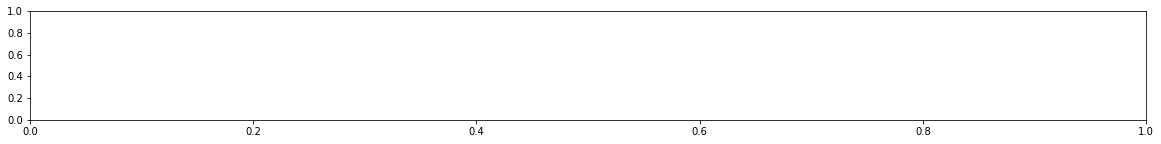

In [26]:
plot.plot_diary(c_an_agent[drange], 1)

In [27]:
c_an_agent.head()

,uid,datetime,lat,lng,leaving_datetime,cluster
0,2,2019-01-01 08:00:00.000000,45.967603,11.110130,2019-01-01 12:13:42.404332,19
1,2,2019-01-01 12:13:42.404332,46.030084,11.132063,2019-01-01 13:18:53.947168,18
2,2,2019-01-01 13:18:53.947168,45.980254,11.149517,2019-01-01 19:52:39.774528,9
3,2,2019-01-01 19:52:39.774528,45.966399,10.626250,2019-01-01 20:23:48.705208,75
4,2,2019-01-01 20:23:48.705208,45.976238,11.123546,2019-01-01 23:14:43.219842,8


In [28]:
from skmob.measures.individual import jump_lengths, radius_of_gyration, waiting_times

In [30]:
jls_df = jump_lengths(tdf)
jls_df.head()

100%|██████████| 100/100 [00:00<00:00, 265.49it/s]


,uid,jump_lengths
0,1,"[9.219853787741599, 0.0, 3.602896450183798, 1...."
1,2,"[0.0, 1.412707395508548, 3.598847319345852, 3...."
2,3,"[35.28787872108745, 12.04687503318928, 1.00044..."
3,4,"[13.045893522880208, 13.045893522880208, 0.0, ..."
4,5,"[76.21485981845798, 0.0, 0.0, 1.00046697124180..."


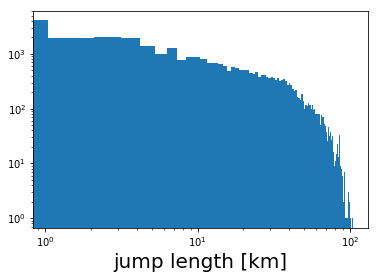

In [33]:
jls = []
for x in jls_df.jump_lengths:
    jls.extend(x)

plt.hist(jls, bins=100)
plt.xlabel('jump length [km]', fontsize=20)
plt.loglog()
plt.show()

In [34]:
wts_df = waiting_times(tdf)
wts_df.head()

100%|██████████| 100/100 [00:00<00:00, 598.73it/s]


,uid,waiting_times
0,1,"[3487.0, 5094.0, 25086.0, 8007.0, 2065.0, 800...."
1,2,"[832.0, 3610.0, 1079.0, 6869.0, 821.0, 2008.0,..."
2,3,"[1937.0, 17472.0, 750.0, 729.0, 854.0, 7434.0,..."
3,4,"[628.0, 20186.0, 1879.0, 691.0, 793.0, 708.0, ..."
4,5,"[707.0, 10045.0, 694.0, 636.0, 1879.0, 2008.0,..."


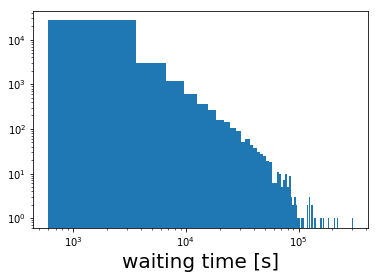

In [37]:
wts = []
for x in wts_df.waiting_times:
    wts.extend(x)

plt.hist(wts, bins=100)
plt.xlabel('waiting time [s]', fontsize=20)
plt.loglog()
plt.show()

100%|██████████| 100/100 [00:00<00:00, 222.72it/s]


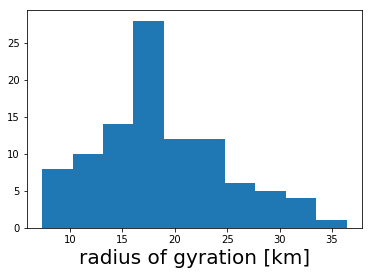

In [40]:
rg_df = radius_of_gyration(tdf)
plt.hist(rg_df.radius_of_gyration.values, bins=10)
plt.xlabel('radius of gyration [km]', fontsize=20)
plt.show()